# 1.3 Analyzing, Visualizing & Treating Missing Values

#### Missing values are caused by incomplete data. It is important to handle missing values effectively which otherwise can lead the researcher to land up with inaccurate inferences.

#### Let us see how to analyze, visualize and treat missing values

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="__main__")
warnings.filterwarnings("ignore", category=PendingDeprecationWarning, module="__main__")

In [2]:
import os
import pandas as pd

os.getcwd()

housepricesdata = pd.read_csv("HousePrices.csv")

In [3]:
housepricesdata.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [4]:
housepricesdata.drop(['Id'], axis=1, inplace=True)

#### The above code imports the required libraries and read the data into Python

## Getting Ready

#### So let us start with analyzing variables with missing values. We also set the options in pandas to view all rows and columns

In [5]:
# Setting options to display all rows and columns
pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.width=None

In [6]:
housepricesdata['MSSubClass'] = housepricesdata['MSSubClass'].astype('object')
housepricesdata['OverallQual'] = housepricesdata['OverallQual'].astype('object')
housepricesdata['OverallCond'] = housepricesdata['OverallCond'].astype('object')


In [7]:
# Checking dimension
housepricesdata.shape

(1460, 80)

In [8]:
housepricesdata.shape[0]

1460

In [9]:
# Check which variables have missing values
housepricesdata.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [10]:
# Seeing missing values in percentage
housepricesdata.isnull().sum()*100/housepricesdata.shape[0]

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [11]:
columns_with_missing_values=housepricesdata.columns[housepricesdata.isnull().any()]

housepricesdata[columns_with_missing_values].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### Visualize the missing values in absolute & percentage term

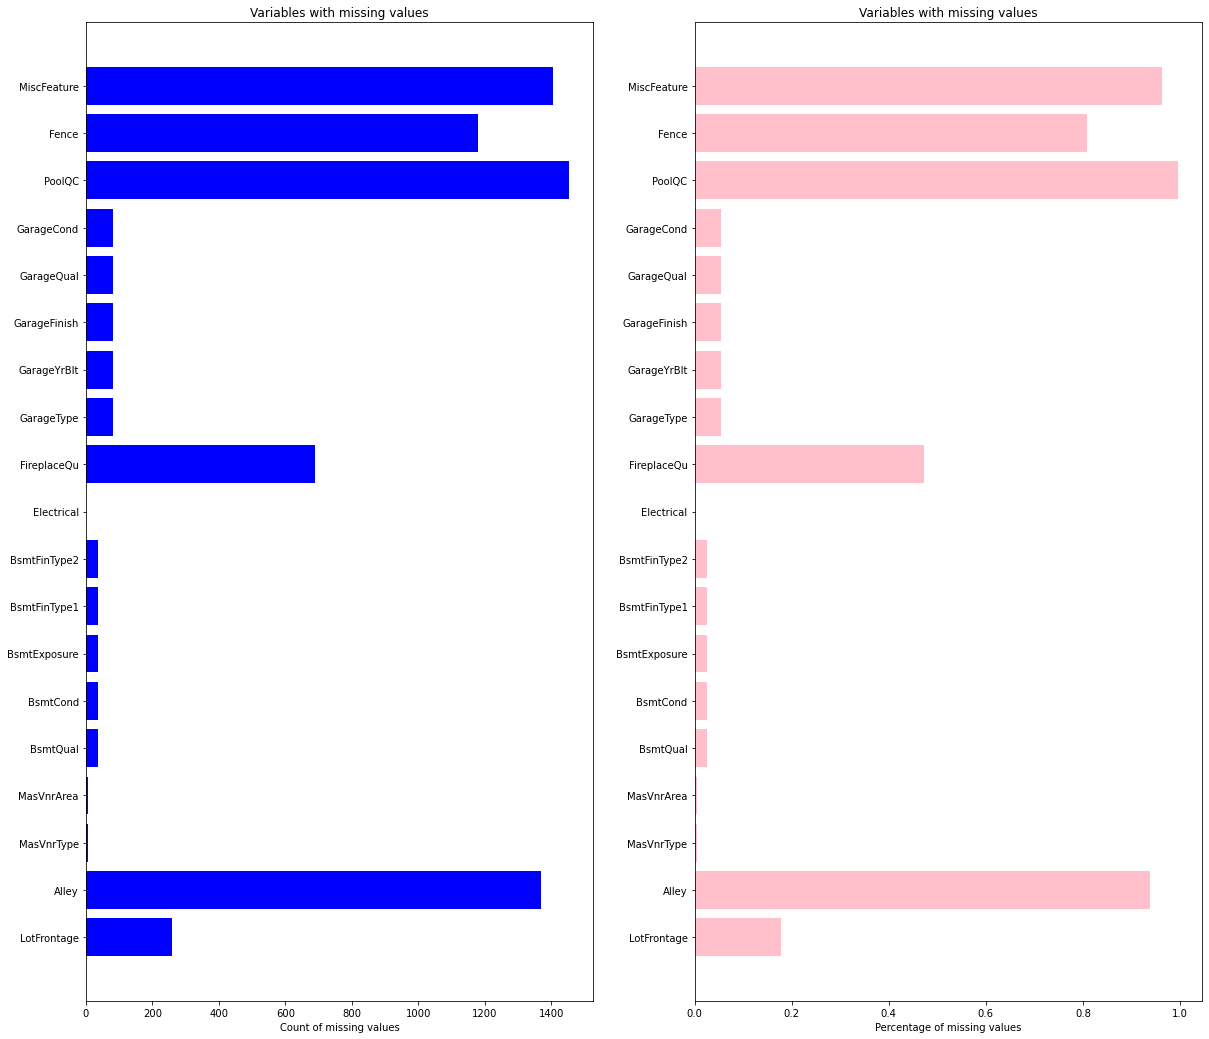

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
# To hold variable names
labels = [] 

# To hold the count of missing values for each variable 
valuecount = [] 

# To hold the percentage of missing values for each variable
percentcount = [] 

for col in columns_with_missing_values:
    labels.append(col)
    valuecount.append(housepricesdata[col].isnull().sum())
    percentcount.append(housepricesdata[col].isnull().sum()/housepricesdata.shape[0])
    
ind = np.arange(len(labels))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,18))

rects = ax1.barh(ind, np.array(valuecount), color='blue')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation='horizontal')
ax1.set_xlabel("Count of missing values")
ax1.set_title("Variables with missing values");

rects = ax2.barh(ind, np.array(percentcount), color='pink')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='horizontal')
ax2.set_xlabel("Percentage of missing values")
ax2.set_title("Variables with missing values");

#### We notice variables like Alley, PoolQC, Fence, MiscFeature have 80% to 90% missing values. 

#### But there is a catch. Look at the variable Alley again. It shows 93.76% missing values. Did we say in our Data Manipulation section that we look into the data definitions? A close look at the variable description for Alley, we see that the variable has 3 levels - Gravel, Paved and No Access. In the original dataset, 'No Access' is codified as 'NA' and when it is read in Python, 'NA' is treated as NaN, meaning missing value. This is absolutely wrong. 

#### So we replace the missing values for Alley with 'NoAccess'.

In [13]:
# Replacing missing values with 'NoAccess' in Alley variable
housepricesdata['Alley'].fillna('NoAccess', inplace=True)

#### We can also visualize the missing values using charts

<AxesSubplot:>

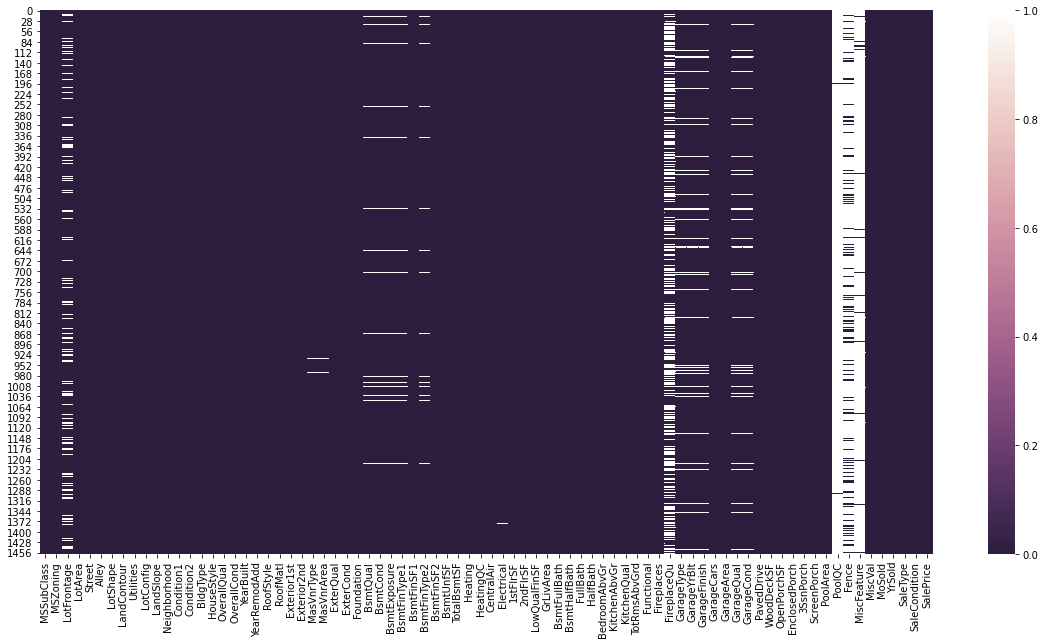

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(housepricesdata.isnull(), cmap=cmap)

#### We notice from the data description that LotFrontage is a continuous variable and has around 17.739% missing values. We decide to replace the missing values with median.

In [15]:
housepricesdata['LotFrontage'].fillna(housepricesdata['LotFrontage'].median(), inplace=True)

In [16]:
housepricesdata.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,22.027677,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

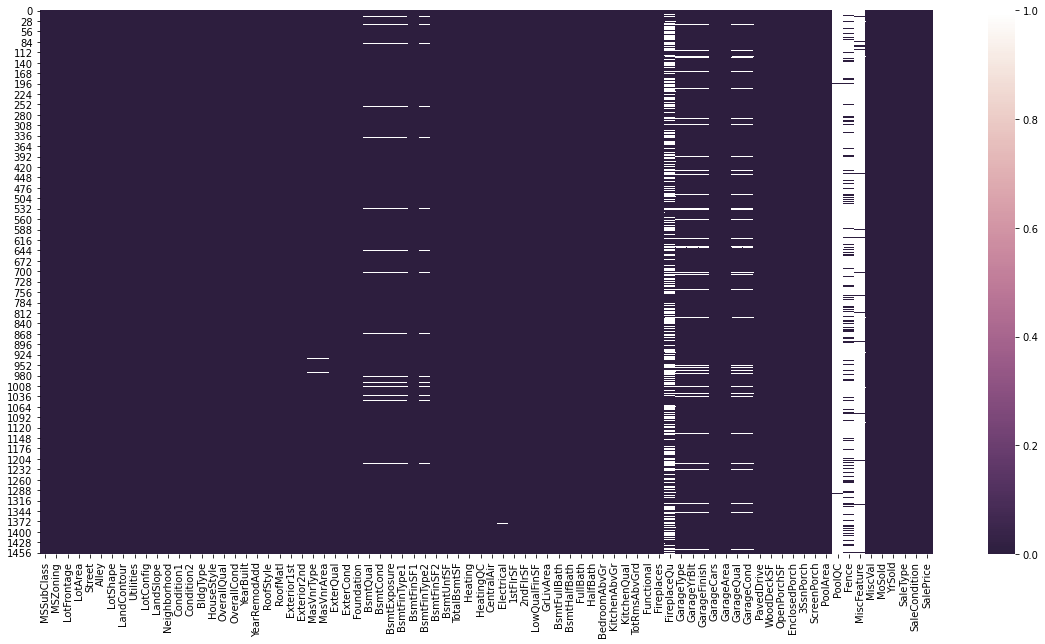

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(housepricesdata.isnull(), cmap=cmap)

#### From the above plot, we have easy readability of the variables which have large number of missing values.

#### We can remove those variables from our analysis.


#### We notice that in the following variables, NA has some meaning as follows:
#### PoolQC: NA stands for No Pool
#### Fence: NA stands for No Fence
#### MiscFeature: NA stands for No Misc Features
#### Also for all Basement related variables, NA means No Basement.
#### Similarly, for all garage related variables, NA stands for No garage
#### For FireplaceQu, we see NA means No Fireplace

In [18]:
# Replacing all NA values with their original meaning
housepricesdata['BsmtQual'].fillna('No Basement', inplace=True)
housepricesdata['BsmtCond'].fillna('No Basement', inplace=True)
housepricesdata['BsmtExposure'].fillna('No Basement', inplace=True)
housepricesdata['BsmtFinType1'].fillna('No Basement', inplace=True)
housepricesdata['BsmtFinType2'].fillna('No Basement', inplace=True)

housepricesdata['GarageYrBlt'].fillna(0, inplace=True)

# For observations where GarageType is null, we replace null values in GarageYrBlt=0
housepricesdata['GarageType'].fillna('No Garage', inplace=True)
housepricesdata['GarageFinish'].fillna('No Garage', inplace=True)
housepricesdata['GarageQual'].fillna('No Garage', inplace=True)
housepricesdata['GarageCond'].fillna('No Garage', inplace=True)


housepricesdata['PoolQC'].fillna('No Pool', inplace=True)
housepricesdata['Fence'].fillna('No Fence', inplace=True)
housepricesdata['MiscFeature'].fillna('None', inplace=True)

housepricesdata['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [19]:
housepricesdata.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

<AxesSubplot:>

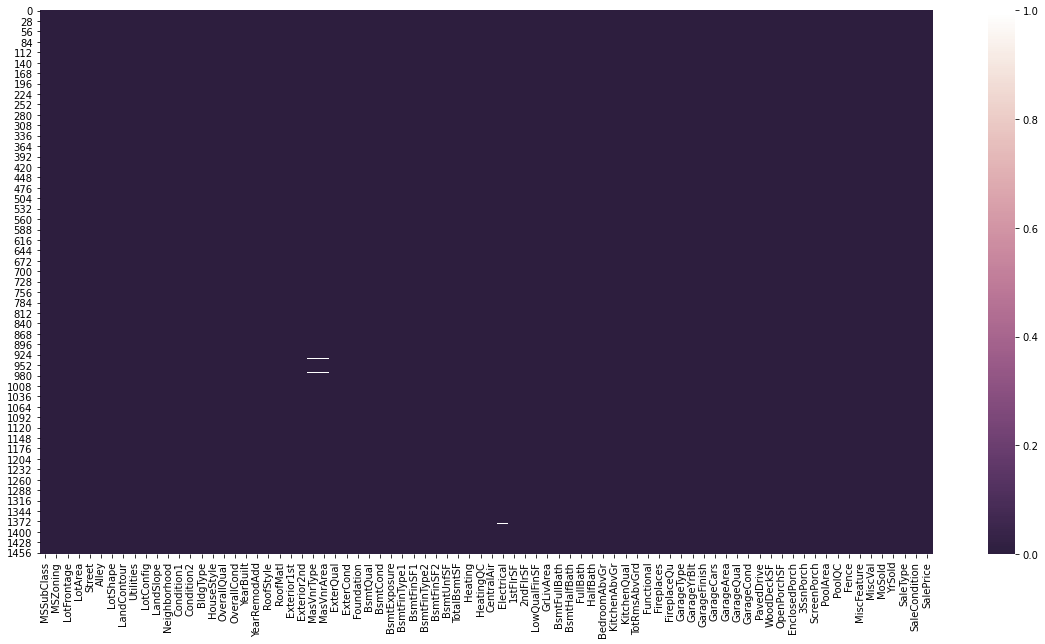

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(housepricesdata.isnull(), cmap=cmap)

In [21]:
# Using crosstab to generate the count of Mas Van Area by type of Mas van Type
print(pd.crosstab(index=housepricesdata["MasVnrType"],\
                  columns=housepricesdata["MasVnrArea"], dropna=False, margins=True))         

MasVnrArea  0.0  1.0  11.0  14.0  16.0  18.0  22.0  24.0  27.0  28.0  30.0  \
MasVnrType                                                                   
BrkCmn        0    0     0     0     0     0     0     0     0     0     0   
BrkFace       1    0     1     1     6     2     1     0     1     1     2   
None        859    2     0     0     0     0     0     0     0     0     0   
Stone         1    0     0     0     1     0     0     1     0     0     0   
All         861    2     1     1     7     2     1     1     1     1     2   

MasVnrArea  31.0  32.0  34.0  36.0  38.0  40.0  41.0  42.0  44.0  45.0  46.0  \
MasVnrType                                                                     
BrkCmn         0     0     0     0     0     0     1     0     0     0     0   
BrkFace        1     1     1     0     1     4     0     2     3     2     1   
None           0     0     0     0     0     0     0     0     0     0     0   
Stone          0     0     0     1     0     0     0 

In [22]:
#### From the above crosstab, we see wherever we have MasVnrType=None, the MasVnrArea is equals to zero except 2 cases where MasVnrArea=1. 
#### Now we notice that wheen MasVnrType is missing, MasVnrArea is also missing.
#### So we replace the missing values in MasVnrType with None
#### And we replace the missing values in MasVnrArea with 0 (Zero)

In [23]:
housepricesdata['MasVnrType'].fillna('None', inplace=True)
housepricesdata['MasVnrArea'].fillna(0, inplace=True)

#### We are still left with a missing value in Electrical

In [24]:
# Using crosstab to generate the count of Mas Van Area by type of Mas van Type
print(pd.crosstab(index=housepricesdata["Electrical"],\
                  columns=housepricesdata['MSSubClass'], dropna=False, margins=True))  

MSSubClass   20  30  40  45   50   60  70  75  80  85  90  120  160  180  190  \
Electrical                                                                      
FuseA        31  18   2   3   20    0   8   2   0   0   5    0    0    0    5   
FuseF         5   4   0   2    8    0   2   0   1   0   4    0    0    0    1   
FuseP         0   1   0   0    0    0   0   0   0   0   1    0    0    0    1   
Mix           0   1   0   0    0    0   0   0   0   0   0    0    0    0    0   
SBrkr       500  45   2   7  116  299  50  14  56  20  42   87   63   10   23   
All         536  69   4  12  144  299  60  16  58  20  52   87   63   10   30   

MSSubClass   All  
Electrical        
FuseA         94  
FuseF         27  
FuseP          3  
Mix            1  
SBrkr       1334  
All         1460  


In [25]:
# Let us take a look at the observation where Electrical has a missing value
housepricesdata['MSSubClass'][housepricesdata['Electrical'].isnull()]

1379    80
Name: MSSubClass, dtype: object

#### We notice that where Electrical type is missing, the MSSubClass is 80. We generate the above cross tab to see the distribution of Electrical types across MSSubClass. We notice that when MSSubClass is 80, th Electrical type is SBrkr. So we replace the missing value in Electrical with SBrkr.

In [26]:
housepricesdata['Electrical'].fillna('SBrkr', inplace=True)

#### Lets visualize the missing value heatmap once more

<AxesSubplot:>

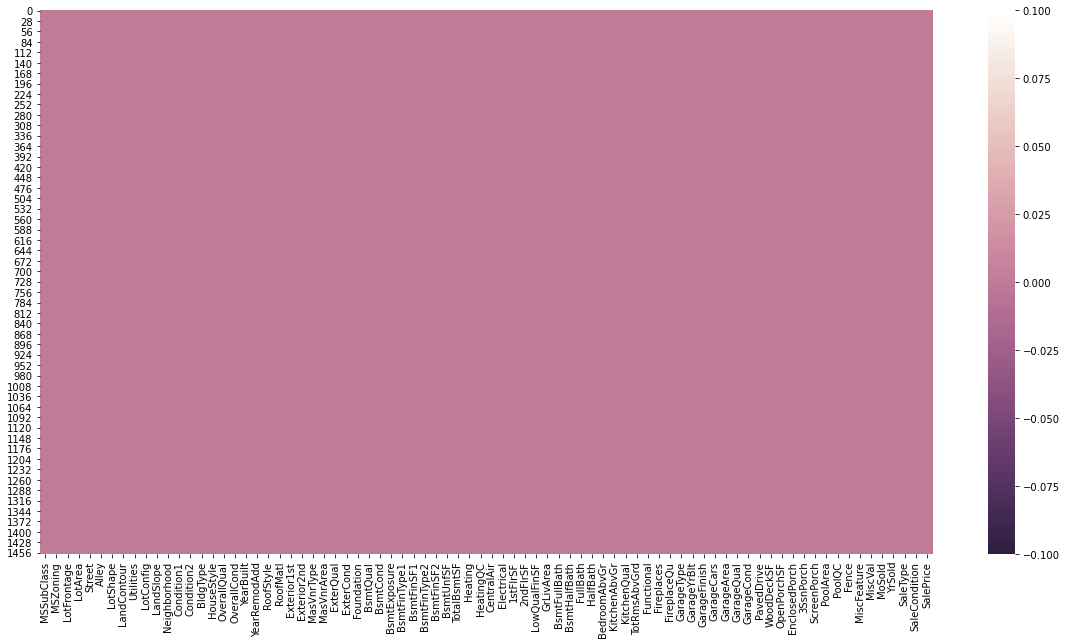

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(housepricesdata.isnull(), cmap=cmap)

# EDA

## See summary statistics

In [28]:
housepricesdata.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NoAccess,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NoAccess,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NoAccess,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NoAccess,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NoAccess,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


In [29]:
housepricesdata.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,22.027677,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Number of columns by data types

In [30]:
#How many columns with different datatypes are there?
housepricesdata.dtypes.value_counts()

object     46
int64      31
float64     3
dtype: int64

## Suppress Warnings

In [31]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [32]:
housepricesdata.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual       object
OverallCond       object
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


## Numerical & Categorical Features

In [33]:
# Pulling out names of numerical variables by conditioning dtypes NOT equal to object type
numerical_features = housepricesdata.dtypes[housepricesdata.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))
print(numerical_features)
# Pulling out names of categorical variables by conditioning dtypes equal to object type
categorical_features = housepricesdata.dtypes[housepricesdata.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))

Number of Numerical features:  34
Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Number of Categorical features:  46


In [34]:
type(numerical_features)

pandas.core.indexes.base.Index

## See distribution for all numeric variables

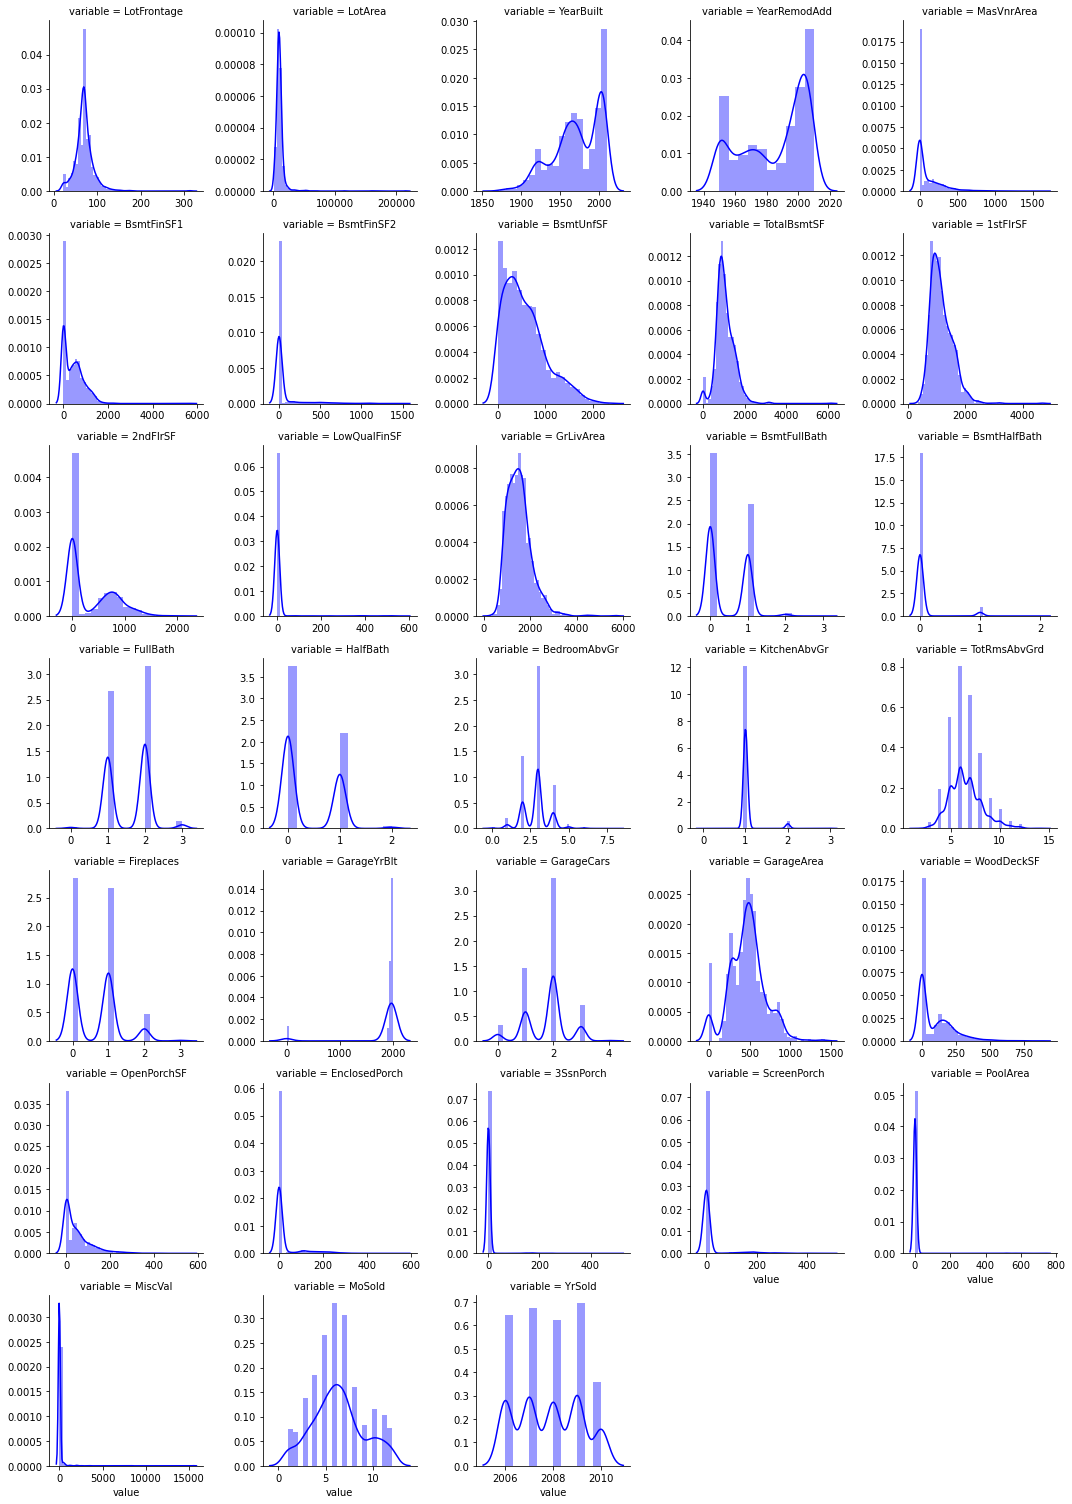

In [35]:
f = pd.melt(housepricesdata, id_vars=['SalePrice'],value_vars= numerical_features[numerical_features != 'SalePrice'])
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value", color="blue")

## Check distribution of SalePrice with respect to variable values

C:\Users\rutvik kumar\anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\rutvik kumar\anaconda\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


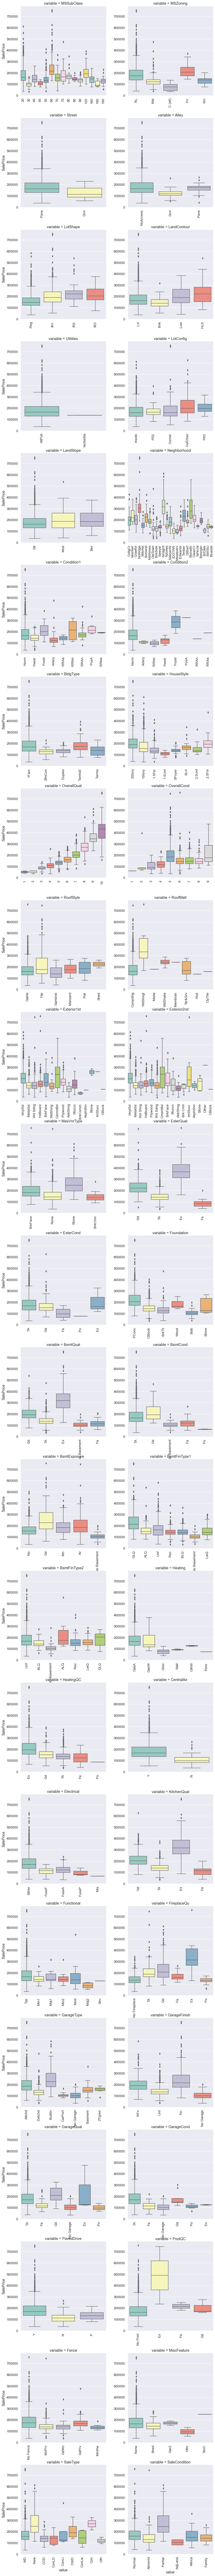

In [36]:
sns.set(font_scale=1.2)

f = pd.melt(housepricesdata, id_vars=['SalePrice'], value_vars=categorical_features)
facetobject = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, size=6)
facetobject.map(sns.boxplot, "value", "SalePrice", palette="Set3")
facetobject.fig.subplots_adjust(wspace=.25, hspace=0.25)


for ax in facetobject.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=90)

In [37]:
# Generate a correlation matrix for all the numeric variables
corr=housepricesdata[numerical_features].corr()
print(corr)

               LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
LotFrontage       1.000000  0.304522   0.116685      0.083348    0.178469   
LotArea           0.304522  1.000000   0.014228      0.013788    0.103321   
YearBuilt         0.116685  0.014228   1.000000      0.592855    0.311600   
YearRemodAdd      0.083348  0.013788   0.592855      1.000000    0.176529   
MasVnrArea        0.178469  0.103321   0.311600      0.176529    1.000000   
BsmtFinSF1        0.214367  0.214103   0.249503      0.128451    0.261256   
BsmtFinSF2        0.042463  0.111170  -0.049107     -0.067759   -0.071330   
BsmtUnfSF         0.124098 -0.002618   0.149040      0.181133    0.113862   
TotalBsmtSF       0.363472  0.260833   0.391452      0.291066    0.360067   
1stFlrSF          0.413773  0.299475   0.281986      0.240379    0.339850   
2ndFlrSF          0.072388  0.050986   0.010308      0.140024    0.173800   
LowQualFinSF      0.037469  0.004779  -0.183784     -0.062419   -0.068628   

In [38]:
corr=housepricesdata.corr()["SalePrice"]
corr[np.argsort(corr)[::-1]]

SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

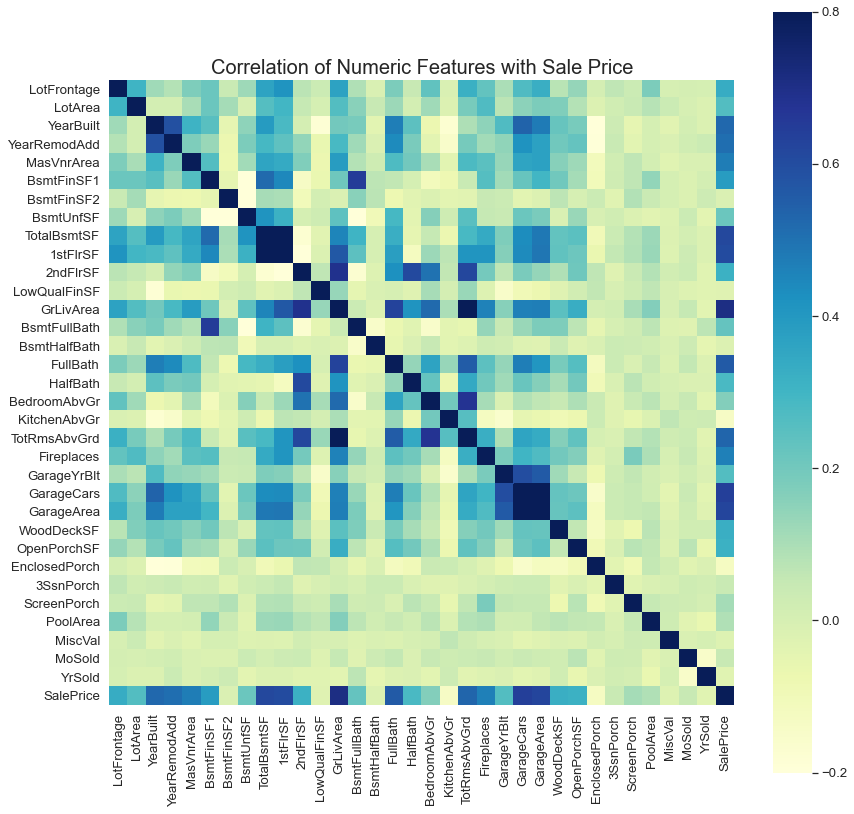

In [39]:
# Get correlation of numeric variables
df_numerical_features= housepricesdata.select_dtypes(include=[np.number])

correlation= df_numerical_features.corr()
correlation["SalePrice"].sort_values(ascending=False)*100
# Correlation Heat Map (Seaborn library)
f, ax= plt.subplots(figsize=(14,14))
plt.title("Correlation of Numeric Features with Sale Price", y=1, size=20)

# cmap - matplotlib colormap name or object - can be used to set the color options
# vmin & vmax is used to anchor the colormap
sns.heatmap(correlation, square= True, vmin=-0.2, vmax=0.8, cmap="YlGnBu")

In [40]:
type(df_numerical_features)


pandas.core.frame.DataFrame

In [41]:
housepricesdata.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual       object
OverallCond       object
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


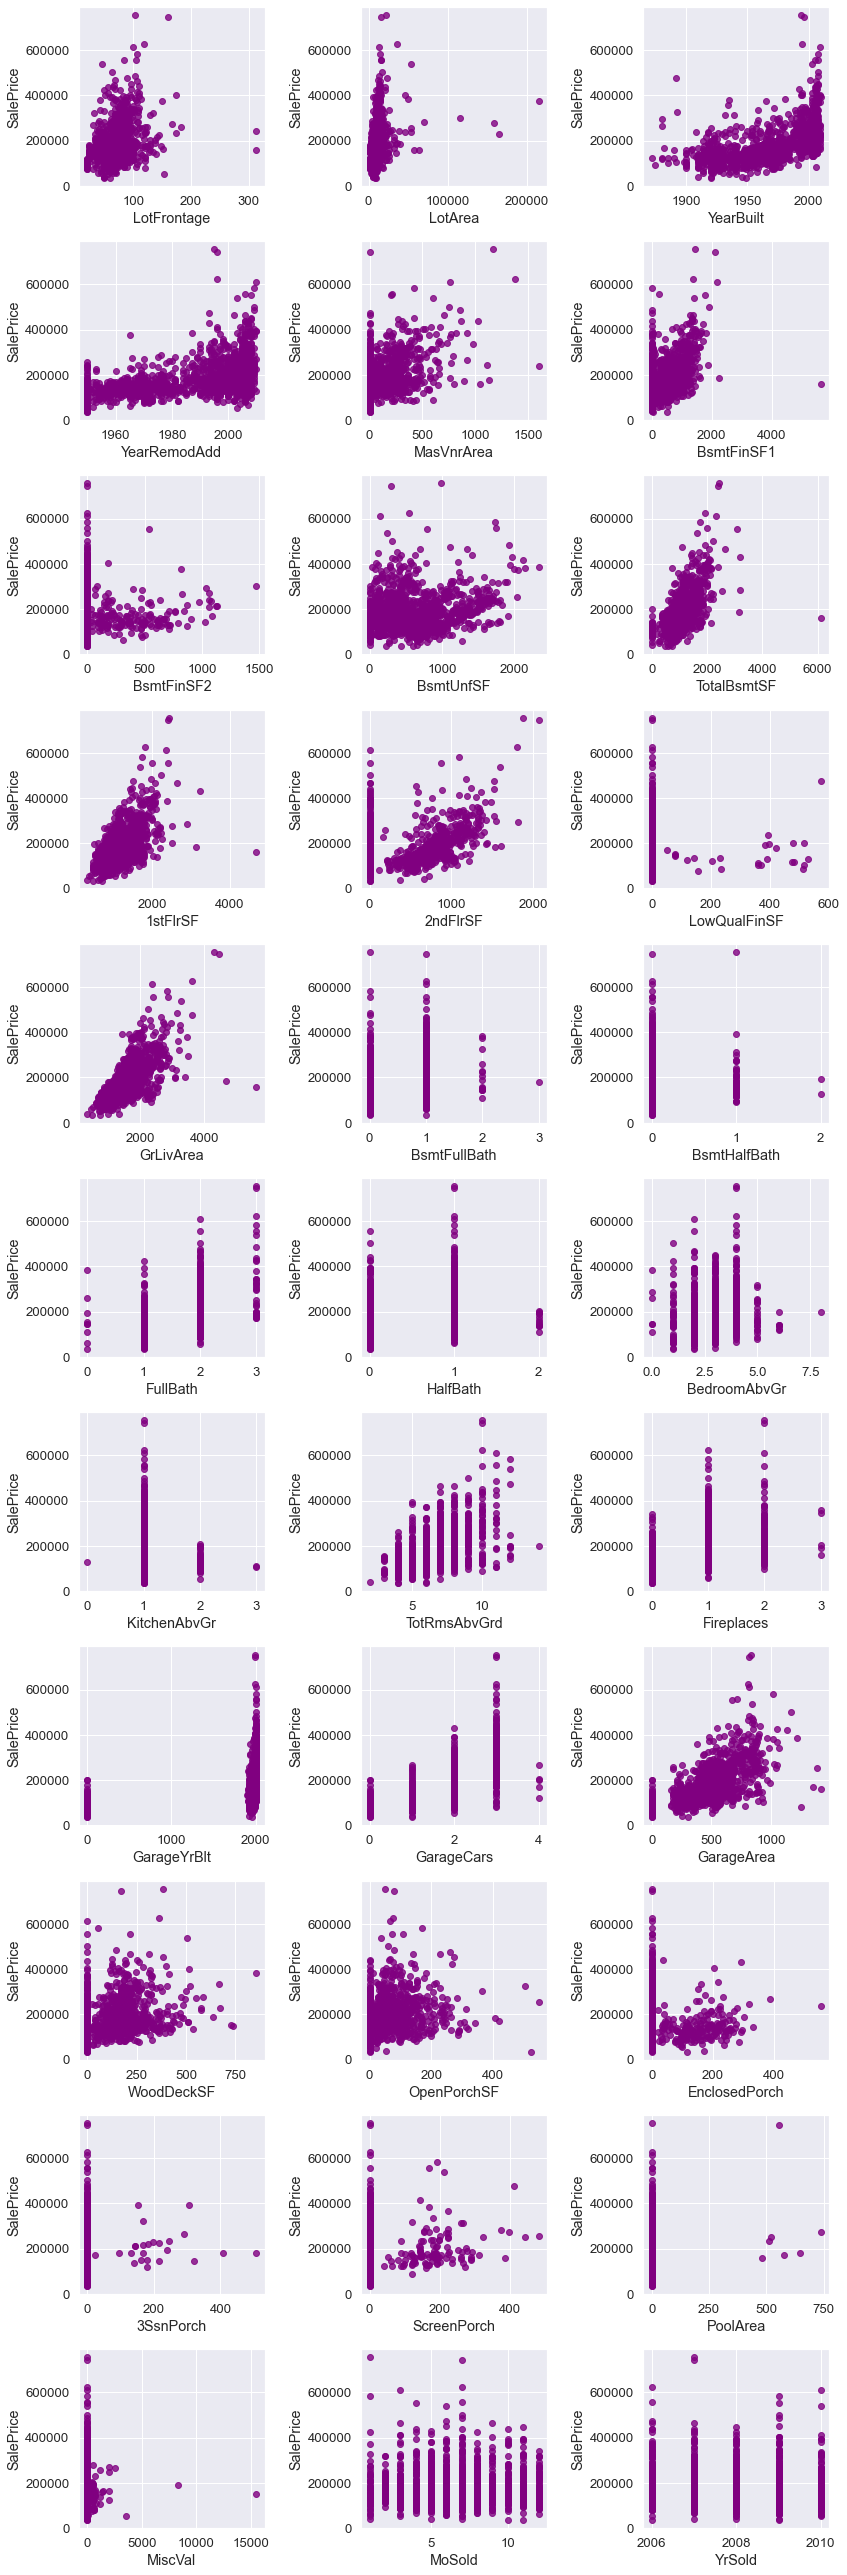

In [42]:
import matplotlib.pyplot as plt
from scipy import stats

row_count = 11
col_count = 3

fig, axs = plt.subplots(row_count, col_count, figsize=(12,36))

exclude_columns = ['Id', 'SalePrice']
plot_numeric_features = [col for col in numerical_features if col not in exclude_columns]


for eachrow in range(0,row_count):
    for eachcol in range(0,col_count):  
        i = eachrow*col_count + eachcol
        if i < len(plot_numeric_features):
            sns.regplot(housepricesdata[plot_numeric_features[i]], housepricesdata['SalePrice'], \
                        ax = axs[eachrow][eachcol], color='purple', fit_reg=False)

# tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area                
plt.tight_layout()    
plt.show()   

In [44]:
housepricesdata.to_csv("Final_HousePri")